#### Analytical vs. numerical solutions to a differential equation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

From the residence time example in class:
- well mixed upper ocean with low phosphate
- upwelling velocity bringing in higher phosphate concentration
- How will the concentration evolve over time?

In [2]:
h = 100 # m
C_0 = 0.1 # umol/kg P
f_in = 5 # m/d

C_in = 2 # umol/kg P

V = h * 1 * 1 # m3

rho = 1025 # kg / m3
print('Volume: ' + str(V) + ' m^3')


Volume: 100 m^3


Analytical Solution
- explicitly solve the differential equation, or use a given solution 
- 𝐶_𝑡  −𝐶_𝑖𝑛𝑓𝑙𝑜𝑤=(𝐶_0−𝐶_𝑖𝑛𝑓𝑙𝑜𝑤 ) 𝑒^(−(𝑓/𝑉×𝑡) )


In [5]:
t = 1000 # days 
C_t = ((C_0 - C_in)*rho*np.exp(-f_in/V*t)+C_in*rho)/rho

print('P conc. after ' + str(t) + ' days is: ' + str(np.round(C_t, decimals=2)) + ' umol/kg')

P conc. after 1000 days is: 2.0 umol/kg


Numerical solution
- Calculate the flux in and out of the box at each time step and keep track of the cumulative impacts

In [6]:
# initialize arrays:

t_interval = 1 # days per time step - note, there is an error in the code below, so changing this interval doesn't seem to quite work yet
t_max = 100

t_vector = np.arange(1, t_max, t_interval)
print(t_vector)

ML_C = np.zeros(len(t_vector)) # umol kg-3
ML_C_inventory = np.zeros(len(t_vector)) # umol
dC_dt = np.zeros(len(t_vector)) # umol kg-3 t-1

ML_C[0] = C_0
ML_C_inventory[0]=ML_C[0]*rho * V # umol

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]


P conc. after 98 days is: 0.85 umol/kg


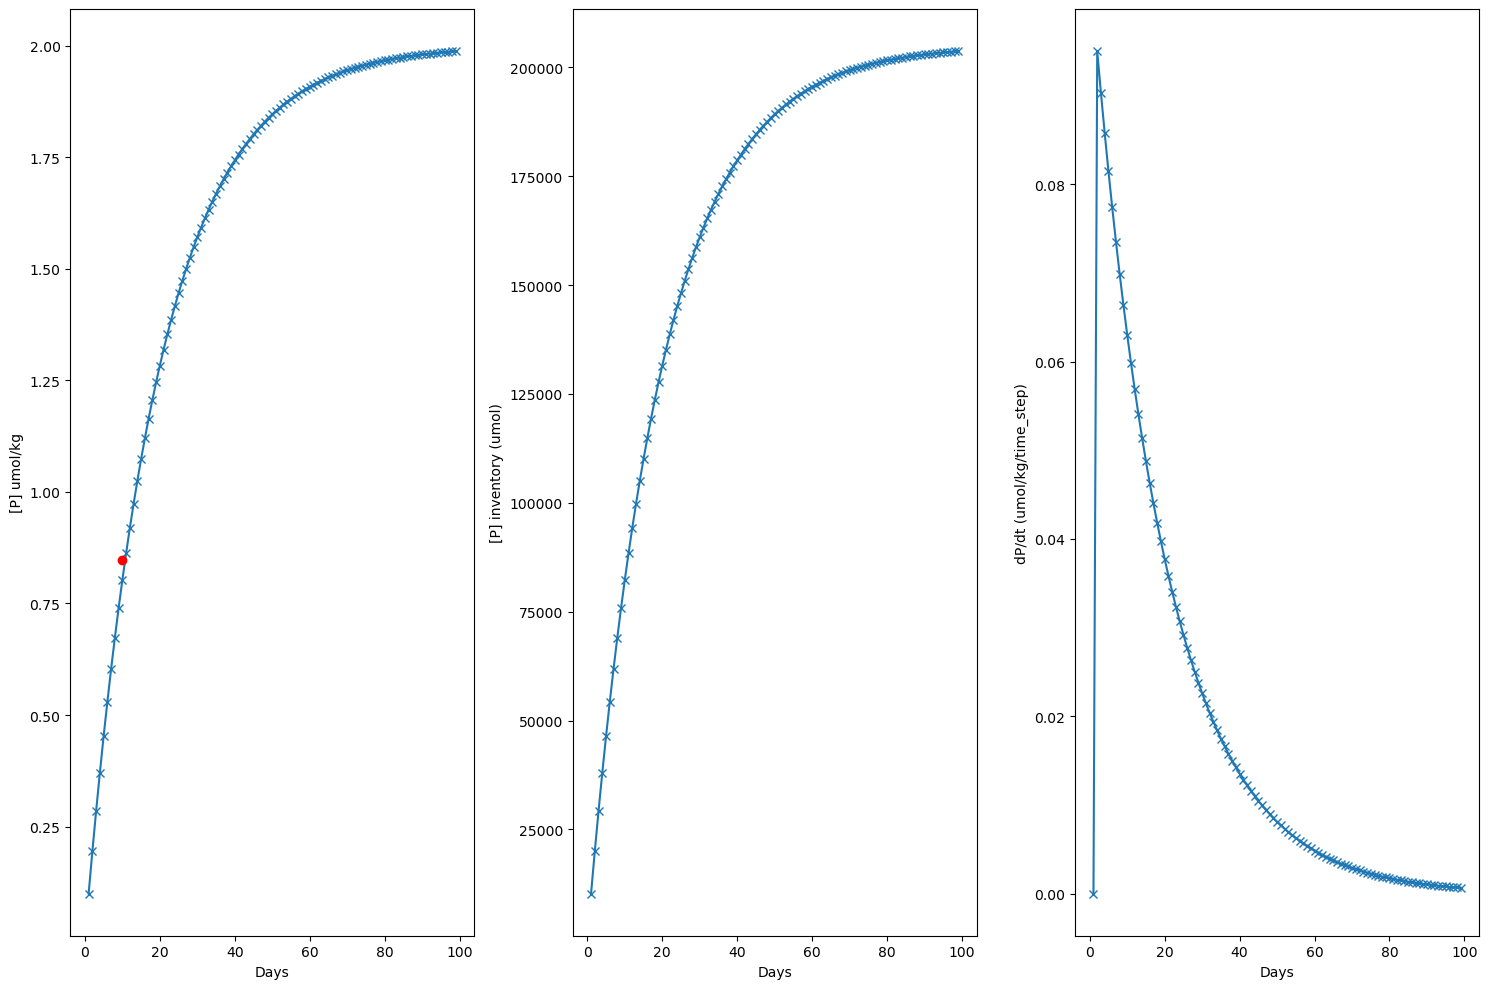

In [7]:
# loop through iterative calculation:

for t in np.arange(1, len(t_vector)): # start at second time step, first time step contains initial conditions
    
    
    dC_dt[t] = (f_in*t_interval*(C_in - ML_C[t-1])*rho/(V*rho))/t_interval # umol kg t-1
    ML_C_inventory[t] = V*dC_dt[t]*rho + ML_C_inventory[t-1]
    ML_C[t] = ML_C_inventory[t]/(V*rho)

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.plot(t_vector, ML_C,'x-')
plt.ylabel('[P] umol/kg')
plt.xlabel('Days')

t_analytical = 10 # days 
C_t = ((C_0 - C_in)*rho*np.exp(-f_in/V*t_analytical)+C_in*rho)/rho

plt.plot(t_analytical, C_t, 'ro')

print('P conc. after ' + str(t) + ' days is: ' + str(np.round(C_t, decimals=2)) + ' umol/kg')

plt.subplot(1,3,2)
plt.plot(t_vector, ML_C_inventory,'x-')
plt.ylabel('[P] inventory (umol)')
plt.xlabel('Days')

plt.subplot(1,3,3)
plt.plot(t_vector, dC_dt,'x-')
plt.ylabel('dP/dt (umol/kg/time_step)')
plt.xlabel('Days')

plt.tight_layout()